In [26]:
import sys
import os
sys.path.append("..") 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import Preprocessor
from src.lstm_forecasting import LSTMForecaster, LSTMTimeSeries
from sklearn.metrics import mean_squared_error
from preprocess import *
from add_features import *
from models import *
# Pour ne pas afficher de warnings inutiles
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
champs_elysees_df = pd.read_csv('../data/traffic/champs_elysees.csv', sep=";")
# convention_df = pd.read_csv('../data/traffic/convention.csv', sep=";")
# sts_peres_df = pd.read_csv('../data/traffic/sts_peres.csv', sep=";")

weather_df = pd.read_csv('../data/weather/weather_paris.csv')
holidays_df = pd.read_csv('../data/events/french_holidays.csv', sep=";")
football_matches_df = pd.read_csv('../data/events/football_matches_2024_2025.csv')

In [28]:
# champs_elysees_df.isna().sum()/champs_elysees_df["Identifiant arc"].count()

In [29]:
preprocessor = Preprocessor(df=champs_elysees_df)

# On applique ton pipeline de preprocessing
df_processed = preprocessor.fit_transform(holidays_df=holidays_df, weather_df=weather_df, sports_df=football_matches_df)

print("Preprocessed Data :", df_processed.shape)
display(df_processed.sample(5))


Preprocessed Data : (8627, 45)


,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,...,wind_speed_10m (km/h),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),apparent_temperature (°C),rain (mm),sport_event_name,is_sport_event,Débit horaire_outlier_iqr,Taux d'occupation_outlier_iqr
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,,
2024-10-09 22:00:00,4264,AV_Champs_Elysees,765.0,8.61000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2025-03-20 16:00:00,4264,AV_Champs_Elysees,993.0,18.07222,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2024-10-11 16:00:00,4264,AV_Champs_Elysees,942.0,26.72111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2025-02-15 01:00:00,4264,AV_Champs_Elysees,831.0,13.60667,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2025-08-16 04:00:00,4264,AV_Champs_Elysees,728.0,11.90611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [30]:
df_champs=pipeline(champs_elysees_df, window=3)

8627
9524


# LSTM Forecasting

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0372 - val_loss: 0.0216
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0235 - val_loss: 0.0176
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0202 - val_loss: 0.0171
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0192 - val_loss: 0.0168
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0188 - val_loss: 0.0165
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0185 - val_loss: 0.0156
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0181 - val_loss: 0.0159
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0179 - val_loss: 0.0160
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0176 - val_loss: 0.0158
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Débit horaire : RMSE = 206.26, Mean = 737.55, Relative error = 27.96%
Taux d'occupation : RMSE = 8.10, Mean = 16.48, Relative error = 49.13%


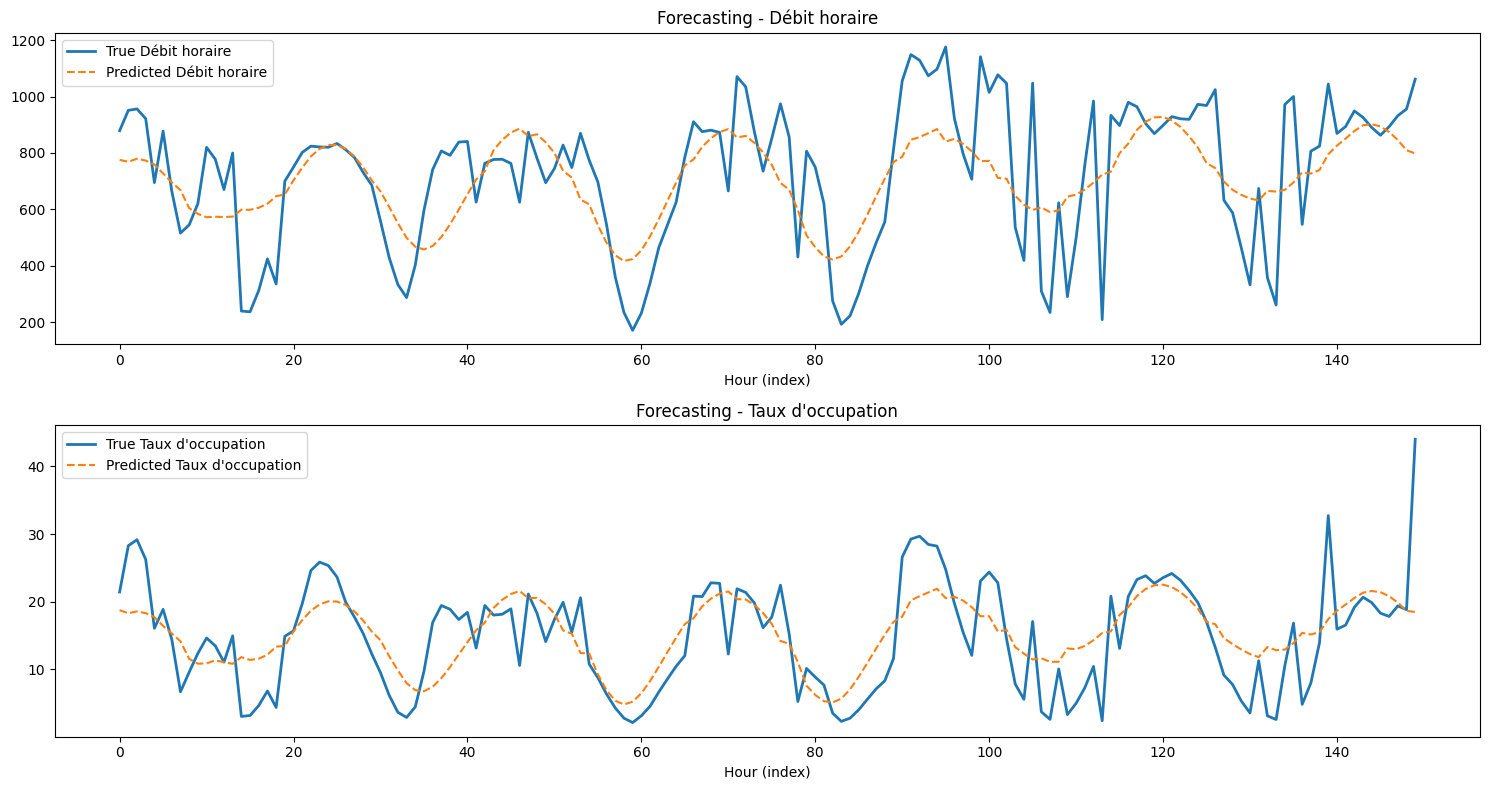

In [5]:
forecaster = LSTMForecaster(
    seq_length= 168,  # 7 historical days
    pred_length=72,  # prediction 72h in advance
    lstm_units=64,
    dropout=0.2,
    use_weather=False,
    use_holidays=False,
    use_sport=False,
    use_outliers=False
)

# Preparation of sequences
X_train, X_test, y_train, y_test = forecaster.prepare_data(df_lisse)

# Training
history = forecaster.train(
    X_train, y_train,
    X_test, y_test,
    epochs=10, batch_size=32
)
y_test_inv, y_pred_inv = forecaster.evaluate(X_test, y_test)

# Visualisation on the first 72 hours
forecaster.plot_predictions(y_test_inv, y_pred_inv, n_plot=150)

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Débit horaire : RMSE = 216.63, Mean = 738.55, Relative error = 29.33%
Taux d'occupation : RMSE = 8.20, Mean = 16.53, Relative error = 49.60%


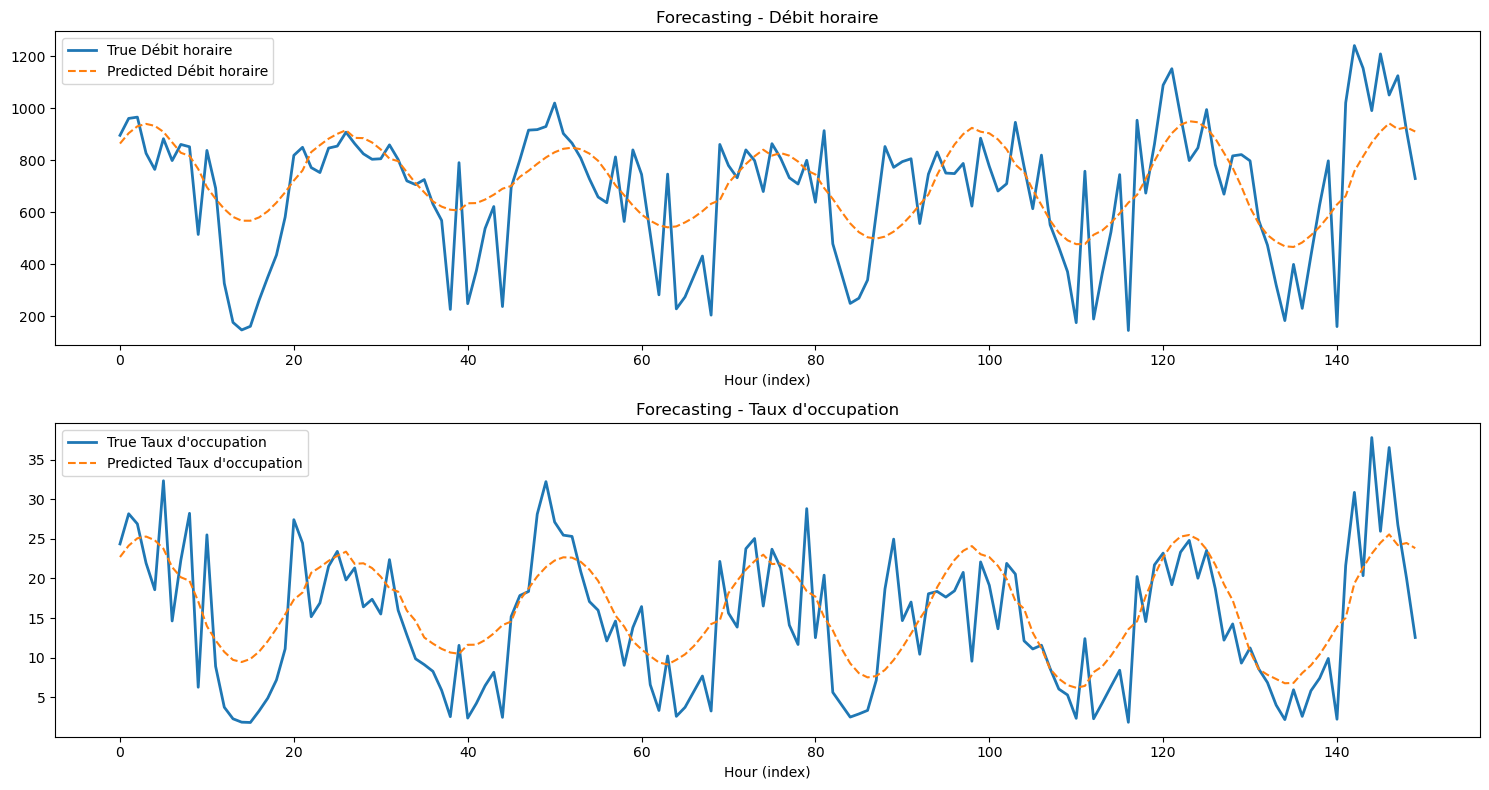

In [6]:
# Concaténer train + test pour la CV (on prend tout)
X_all = np.concatenate([X_train, X_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

forecaster.time_series_cv(X_all, y_all, n_splits=5, epochs=5, batch_size=32)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0410 - val_loss: 0.0151
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0191 - val_loss: 0.0139
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0172 - val_loss: 0.0130
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0158 - val_loss: 0.0118
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0142 - val_loss: 0.0103
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Débit horaire : RMSE = 247.03, Mean = 709.81, Relative error = 34.80%
Taux d'occupation : RMSE = 6.92, Mean = 13.86, Relative error = 49.98%
Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0305 - val_loss: 0.0214
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0152 - val_loss: 0.0163
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0123 - val_loss: 0.0133
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0113 - val_loss: 0.0117
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.01

# XGBoost model

In [6]:
from src.xgb_forecasting import XGBoostModel

Train set: (9284, 23), Test set: (72, 23) (72 hours)
Débit horaire : RMSE = 102.80, Mean = 776.43, Relative Error = 13.24%
Taux d'occupation : RMSE = 3.09, Mean = 17.19, Relative Error = 17.98%


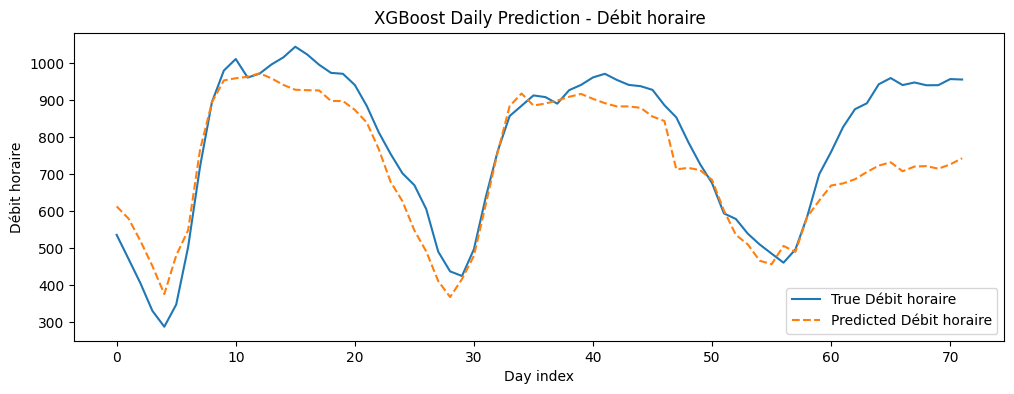

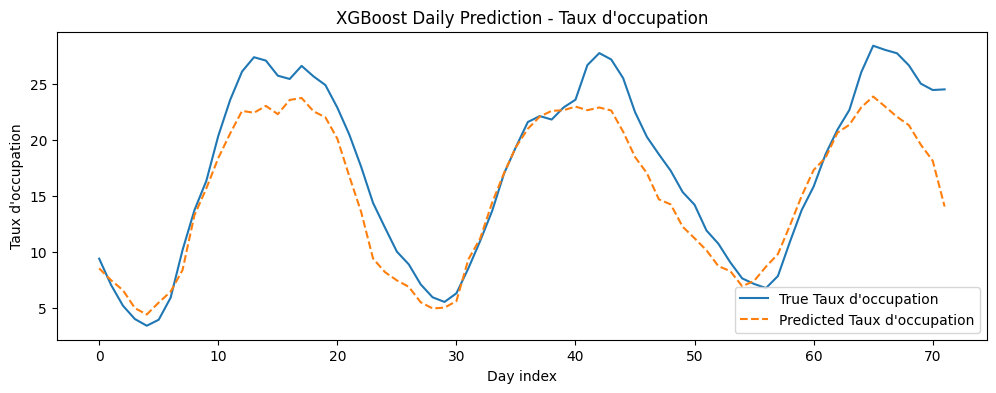

In [25]:
targets = ['Débit horaire', "Taux d'occupation"]
features_xgb = ['is_holiday',
                'is_sport_event',
                'temperature_2m (°C)','wind_speed_10m (km/h)',
                'precipitation (mm)','cloud_cover (%)'] 

features_xgb = [
        'hour_sin', 'hour_cos', 
        'weekday_sin', 'weekday_cos', 
        'month_sin', 'month_cos', 
        'dayofyear_sin', 'dayofyear_cos',
        'is_weekend', 'is_holiday',
        'Vacances Scolaires Paris', 
        'temperature_2m (°C)', 'wind_speed_10m (km/h)',
        'precipitation (mm)', 'cloud_cover (%)',
        'Débit horaire_outlier_high', 'Débit horaire_outlier_low', 'Débit horaire_special_event',
        "Taux d'occupation_outlier_high", "Taux d'occupation_outlier_low", "Taux d'occupation_special_event"]

df_xgb = df_champs.copy()
df_xgb['lag_1d'] = df_xgb['Débit horaire'].shift(24)
df_xgb['lag_1w'] = df_xgb['Débit horaire'].shift(24*7)

features_xgb += ['lag_1d', 'lag_1w']

df_xgb = df_xgb.dropna(subset=['lag_1d', 'lag_1w'] + targets).copy()

xgb_model = XGBoostModel(df_xgb, features_xgb, targets)
xgb_model.prepare_data(horizon=72)

xgb_model.fit()

# Prediction on the test set
y_test, y_pred = xgb_model.evaluate()

# Plot
for i, target in enumerate(targets):
    plt.figure(figsize=(12,4))
    plt.plot(y_test[:, i], label=f"True {target}")
    plt.plot(y_pred[:, i], '--', label=f"Predicted {target}")
    plt.title(f"XGBoost Daily Prediction - {target}")
    plt.xlabel("Day index")
    plt.ylabel(target)
    plt.legend()
    plt.show()



In [12]:
cv_results = xgb_model.cross_validate(n_splits=5)

Débit horaire : CV RMSE mean = 146.37, std = 19.79
Taux d'occupation : CV RMSE mean = 4.55, std = 0.84


In [16]:
cv_results = xgb_model.cross_validate(n_splits=5)

Débit horaire : CV RMSE mean = 177.67, std = 23.58
Taux d'occupation : CV RMSE mean = 7.31, std = 1.64


# Hybrid LSTM + XGBoost model 

In [10]:
## Hybrid LSTM + XGBoost model

### LSTM for short-term patterns
lstm_model = LSTMForecaster(
    seq_length= 168,  # 7 historical days
    pred_length=72,  # prediction 72h in advance
    lstm_units=64,
    dropout=0.2,
    use_weather=False,
    use_holidays=False,
    use_sport=False
)

# Preparation of sequences
X_train, X_test, y_train, y_test = lstm_model.prepare_data(df_processed)

# Training
history = lstm_model.train(
    X_train, y_train,
    X_test, y_test,
    epochs=5, batch_size=32
)

# Predictions LSTM
y_test_inv, y_pred_inv = lstm_model.evaluate(X_test, y_test)

### XGBoost for long-term patterns
# Compute daily averages
# daily_df = df_processed.groupby('date').agg({
#     'Débit horaire':'mean',
#     "Taux d'occupation":'mean',
#     'is_holiday':'first',
#     'is_sport_event':'first',
#     'temperature_2m (°C)':'mean',
#     'wind_speed_10m (km/h)':'mean',
#     'precipitation (mm)':'mean',
#     'cloud_cover (%)':'mean'
# }).reset_index()

# Features for XGBoost
features_xgb = ['is_holiday','is_sport_event','temperature_2m (°C)',
                'wind_speed_10m (km/h)','precipitation (mm)','cloud_cover (%)']


df_xgb = df_processed.copy()
df_xgb['lag_1d'] = df_xgb['Débit horaire'].shift(24)
df_xgb['lag_1w'] = df_xgb['Débit horaire'].shift(24*7)

features_xgb += ['lag_1d', 'lag_1w']


# Instanciate XGBoost
xgb_model = XGBoostModel(df_xgb, features_xgb, lstm_model.targets)
xgb_model.prepare_data(horizon=72)
xgb_model.fit()

# Predictions XGBoost (long-term)
y_pred_xgb = xgb_model.predict()


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 0.0234 - val_loss: 0.0131
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0117 - val_loss: 0.0105
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0111 - val_loss: 0.0110
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Débit horaire : RMSE = 216.27, Mean = 738.55, Relative error = 29.28%
Taux d'occupation : RMSE = 8.23, Mean = 16.53, Relative error = 49.81%
Train set: (1417, 8), Test set: (72, 8) (72 hours)


In [11]:
# Combine LSTM and XGBoost predictions
y_test_inv, y_pred_lstm_array = lstm_model.evaluate(X_test, y_test)
print("LSTM Prediction Array Shape :", y_pred_lstm_array.shape)
y_pred_lstm_hourly = y_pred_lstm_array[-1, :, :]

alpha = 0.3
y_pred_final = alpha * y_pred_lstm_hourly + (1-alpha) * y_pred_xgb
print("Final Prediction Shape :", y_pred_final.shape)

y_true = y_test_inv[-1, :, :]  # real 72h for the last batch of LSTM
y_pred = y_pred_final           # 72h combined LSTM + XGBoost

for i, target in enumerate(lstm_model.targets):
    rmse = np.sqrt(np.mean((y_true[:, i] - y_pred[:, i])**2))
    mean_val = np.mean(y_true[:, i])
    rel_error = 100 * rmse / mean_val
    print(f"{target} : RMSE = {rmse:.2f}, Mean = {mean_val:.2f}, Relative Error = {rel_error:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Débit horaire : RMSE = 216.27, Mean = 738.55, Relative error = 29.28%
Taux d'occupation : RMSE = 8.23, Mean = 16.53, Relative error = 49.81%
LSTM Prediction Array Shape : (1678, 72, 2)
Final Prediction Shape : (72, 2)
Débit horaire : RMSE = 265.06, Mean = 772.65, Relative Error = 34.31%
Taux d'occupation : RMSE = 9.53, Mean = 17.08, Relative Error = 55.82%


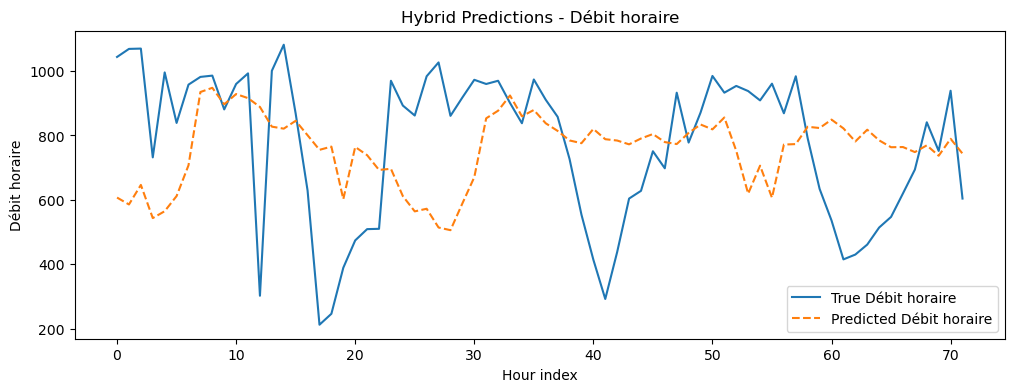

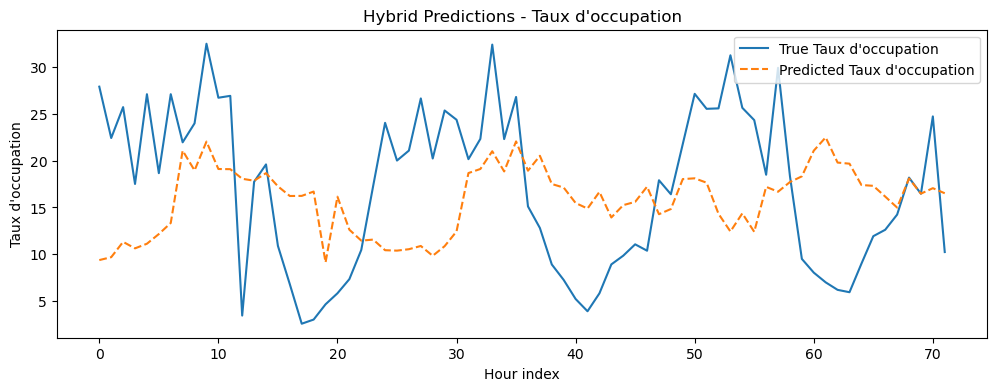

In [12]:
# Plot
for i, target in enumerate(targets):
    plt.figure(figsize=(12,4))
    plt.plot(y_test_inv[-1, :, :][:, i], label=f"True {target}")
    plt.plot(y_pred_final[:, i], '--', label=f"Predicted {target}")
    plt.title(f"Hybrid Predictions - {target}")
    plt.xlabel("Hour index")
    plt.ylabel(target)
    plt.legend()
    plt.show()

# NEW LSTM

In [ ]:
targets = ['Débit horaire', "Taux d'occupation"]

features = [
        'hour_sin', 'hour_cos', 
        'weekday_sin', 'weekday_cos', 
        'month_sin', 'month_cos', 
        'dayofyear_sin', 'dayofyear_cos',
        'is_weekend', 'is_holiday',
        'Vacances Scolaires Paris', 
        'temperature_2m (°C)', 'wind_speed_10m (km/h)',
        'precipitation (mm)', 'cloud_cover (%)',
        'Débit horaire_outlier_high', 'Débit horaire_outlier_low', 'Débit horaire_special_event',
        "Taux d'occupation_outlier_high", "Taux d'occupation_outlier_low", "Taux d'occupation_special_event"]


In [33]:
final_eval_size = 72
train_val_df = df_champs.iloc[:-final_eval_size].copy()
final_eval_df = df_champs.iloc[-final_eval_size:].copy()

lstm_model = LSTMTimeSeries(
    features=features,
    targets=targets,
    seq_length=168,
    pred_length=72
)

In [ ]:
lstm_model.cross_validate(train_val_df, n_splits=5, epochs=20, batch_size=32)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Fold 1 - RMSE: 159.60, MEAN: 359.56, MAPE: 163.85%, RMSE/mean: 44.39%
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Fold 2 - RMSE: 128.33, MEAN: 398.46, MAPE: 25.83%, RMSE/mean: 32.21%
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Fold 3 - RMSE: 140.00, MEAN: 380.62, MAPE: 50.33%, RMSE/mean: 36.78%


In [ ]:
lstm_model.train_final(train_val_df, epochs=30, batch_size=32)
y_pred = lstm_model.predict(final_eval_df)
final_eval_true = final_eval_df[targets].values
rmse_final, mape_final, rmse_mean_final,true_mean = LSTMTimeSeries.evaluate_metrics(final_eval_true, y_pred)
print("\nÉvaluation finale sur les 72 dernières heures :")
print(f"RMSE: {rmse_final:.2f}, MEAN: {true_mean:.2f}, MAPE: {mape_final:.2%}, RMSE/mean: {rmse_mean_final:.2%}")

In [5]:
hours = np.arange(1, 73)
for i, target in enumerate(targets):
    plt.figure(figsize=(24,10))
    plt.plot(hours, final_eval_true[:, i], marker='o', label='Vraies valeurs')
    plt.plot(hours, y_pred[:, i], marker='x', label='Prédictions LSTM')
    plt.title(f'Prédiction vs Vraies valeurs : {target}')
    plt.xlabel('Heure')
    plt.ylabel(target)
    plt.grid(True)
    plt.legend()
    plt.show()


NameError: name 'targets' is not defined